In [1]:
from src.model.pipeline import run
import os

In [2]:
# Root directory as working directory
os.chdir('..')
os.getcwd()

'/home/biobot/disk/ldopa'

Baseline:

SVM: 0.765 0.710

XgBoost: 0.966 0.746

AUC Table:
| Model | Baseline | Texture |
| --- | --- | --- |
| SVM | 0.710 |  |
| XgBoost | 0.746 |  |

In [3]:
b1, i1 = run('pat_data', ['classification/2'], [['iteration_1']], print, plot_flag=False, feature_selection=['rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis', 'rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis'], cal_baselines=True)
_, i2 = run('pat_data', ['classification/2'], [['iteration_2']], print, plot_flag=False, feature_selection=['rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis', 'rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis'], cal_baselines=False)
_, i3 = run('pat_data', ['classification/2'], [['iteration_3']], print, plot_flag=False, feature_selection=['rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis', 'rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis'], cal_baselines=False)
_, i4 = run('pat_data', ['classification/2'], [['iteration_4']], print, plot_flag=False, feature_selection=['rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis', 'rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis'], cal_baselines=False)

Task: classification/2

Feature: ['iteration_1']

SEX chi2 p: 0.5414803876006902
CAT chi2 p: 0.9510706628888684
AGE Normaltest p_train: [0.07505303], p_test: [0.48389882]
AGE t-test p: Ttest_indResult(statistic=array([1.54953415]), pvalue=array([0.12271054]))
NUPDR3OF Normaltest p_train: [0.01407325], p_test: [0.53859285]
NUPDR3OF ranksums p: RanksumsResult(statistic=array([0.53408144]), pvalue=array([0.59328519]))
LEDD Normaltest p_train: [2.56158925e-12], p_test: [0.1798008]
LEDD ranksums p: RanksumsResult(statistic=array([0.51837316]), pvalue=array([0.60419794]))
DURATION Normaltest p_train: [0.00553476], p_test: [0.13860719]
DURATION ranksums p: RanksumsResult(statistic=array([-0.45554005]), pvalue=array([0.64872076]))

Demo + Clinic:

Model: svc

AUC train 0.7654370489174017

AUC test 0.7102272727272727

Accuracy train 0.7109826589595376

Accuracy test 0.6739130434782609

Model: xgboost

AUC train 0.9662523389468057

AUC test 0.7462121212121212

Accuracy train 0.9017341040462428



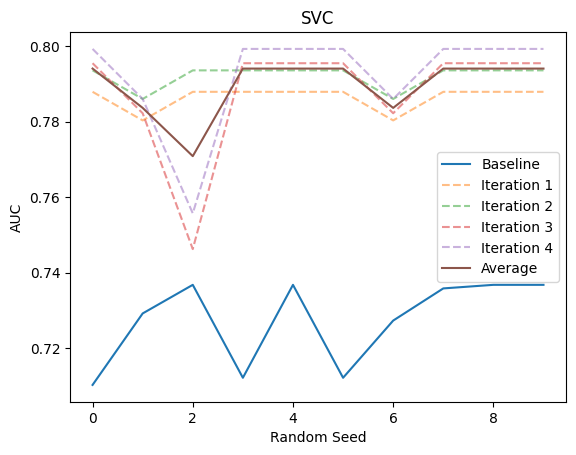

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(b1['svc'], linestyle='solid')
plt.plot(i1['svc'], linestyle='dashed', alpha=0.5)
plt.plot(i2['svc'], linestyle='dashed', alpha=0.5)
plt.plot(i3['svc'], linestyle='dashed', alpha=0.5)
plt.plot(i4['svc'], linestyle='dashed', alpha=0.5)
import numpy as np
plt.plot(np.mean([i1['svc'], i2['svc'], i3['svc'], i4['svc']], axis=0), linestyle='solid')
plt.legend(labels=['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Average'])
plt.title('SVC')
plt.ylabel('AUC')
plt.xlabel('Random Seed')
plt.show()

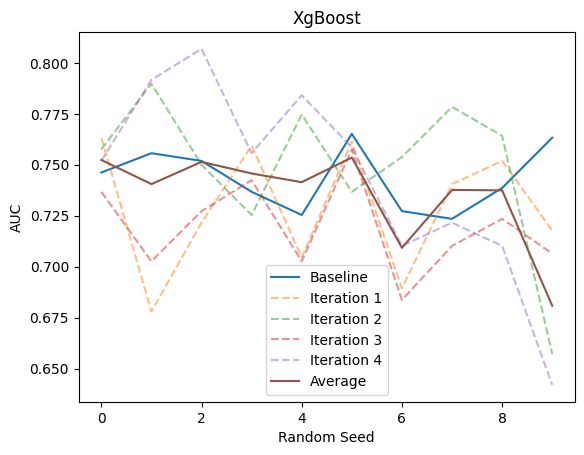

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(b1['xgboost'], linestyle='solid')
plt.plot(i1['xgboost'], linestyle='dashed', alpha=0.5)
plt.plot(i2['xgboost'], linestyle='dashed', alpha=0.5)
plt.plot(i3['xgboost'], linestyle='dashed', alpha=0.5)
plt.plot(i4['xgboost'], linestyle='dashed', alpha=0.5)
import numpy as np
plt.plot(np.mean([i1['xgboost'], i2['xgboost'], i3['xgboost'], i4['xgboost']], axis=0), linestyle='solid')
plt.legend(labels=['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Average'])
plt.title('XgBoost')
plt.ylabel('AUC')
plt.xlabel('Random Seed')
plt.show()

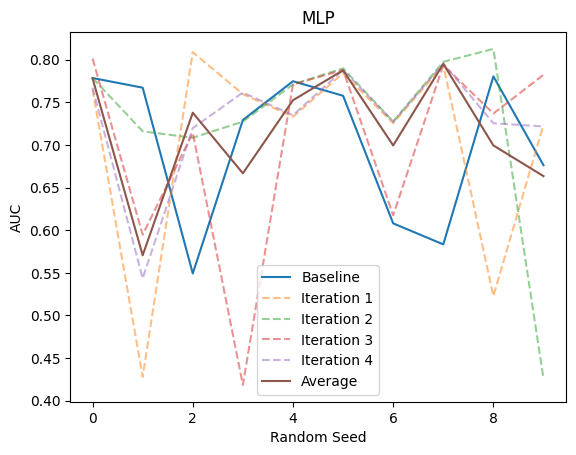

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(b1['mlp'], linestyle='solid')
plt.plot(i1['mlp'], linestyle='dashed', alpha=0.5)
plt.plot(i2['mlp'], linestyle='dashed', alpha=0.5)
plt.plot(i3['mlp'], linestyle='dashed', alpha=0.5)
plt.plot(i4['mlp'], linestyle='dashed', alpha=0.5)
import numpy as np
plt.plot(np.mean([i1['mlp'], i2['mlp'], i3['mlp'], i4['mlp']], axis=0), linestyle='solid')
plt.legend(labels=['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Average'])
plt.title('MLP')
plt.ylabel('AUC')
plt.xlabel('Random Seed')
plt.show()

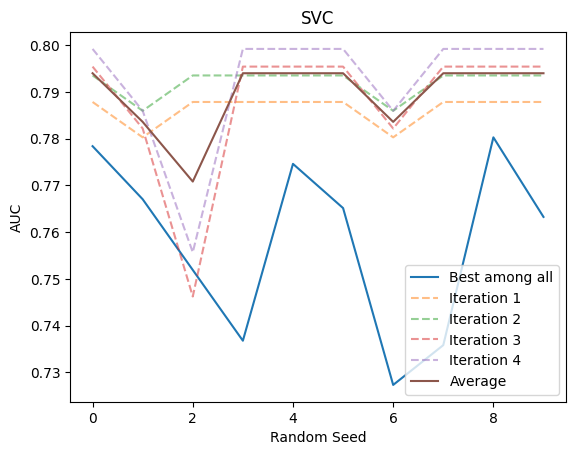

In [7]:
b = [np.max([b1['svc'][i], b1['xgboost'][i], b1['mlp'][i]]) for i in range(len(b1['svc']))]
plt.plot(b, linestyle='solid')
plt.plot(i1['svc'], linestyle='dashed', alpha=0.5)
plt.plot(i2['svc'], linestyle='dashed', alpha=0.5)
plt.plot(i3['svc'], linestyle='dashed', alpha=0.5)
plt.plot(i4['svc'], linestyle='dashed', alpha=0.5)
import numpy as np
plt.plot(np.mean([i1['svc'], i2['svc'], i3['svc'], i4['svc']], axis=0), linestyle='solid')
plt.legend(labels=['Best among all', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Average'])
plt.title('SVC')
plt.ylabel('AUC')
plt.xlabel('Random Seed')
plt.show()

In [8]:
b1

{'svc': [0.7102272727272727,
  0.7291666666666666,
  0.7367424242424242,
  0.7121212121212122,
  0.7367424242424242,
  0.7121212121212122,
  0.7272727272727273,
  0.7357954545454546,
  0.7367424242424242,
  0.7367424242424242],
 'xgboost': [0.7462121212121212,
  0.7556818181818181,
  0.7518939393939394,
  0.7367424242424243,
  0.725378787878788,
  0.7651515151515152,
  0.7272727272727273,
  0.7234848484848485,
  0.7386363636363635,
  0.7632575757575758],
 'mlp': [0.7784090909090909,
  0.7670454545454545,
  0.5492424242424243,
  0.7291666666666666,
  0.7746212121212122,
  0.7575757575757577,
  0.6079545454545454,
  0.5833333333333334,
  0.7803030303030303,
  0.6761363636363638]}